**Dita Julaika Putri <br>
1301194244 <br>
IF-43-10**

In [1]:
# import package
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

# Package untuk visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

### Formulasi Masalah
Diberikannya data pelanggan yang kemudian dikelompokkan berdasar data pelanggan di dealer tanpa memperhatikan label kelas apakah pelanggan tertarik untuk membeli kendaraan baru atau tidak. <br>
Data pelanggan: \
SIM: 0 tidak punya, 1 punya \
Kode_Daerah: kode area tempat tinggal pelanggan \
Sudah_Asuransi: 0 belum punya asuransi, 1 udah punya asuransi \
Umur_kendaraan: umur kendaraan \
Kendaraan_Rusak: 0 belum pernah rusak, 1 sudah pernah rusak \
Premi: jumlah premi yang harus dibayarkan per tahun \
Kanal_Penjualan: kode kanal untuk menghubungi pelanggan (email, telpon, dll) \
Lama_Berlangganan: sudah berapa lama pelanggan menjadi klien perusahaan \
tertarik: 0 tidak, 1 tertarik


In [2]:
# read dataset
df = pd.read_csv('/content/kendaraan_train.csv')
df.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


### Data Exploration dan Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [4]:
df.describe()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,142916.000000,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,82512.446734,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,142916.000000,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,214373.500000,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [5]:
# replace data kategorik yang belum numerik jadi numerik
replaceJK = {'Wanita':0, 'Pria':1}
df = df.replace({'Jenis_Kelamin': replaceJK})

replaceUK = {'< 1 Tahun':0, '1-2 Tahun':1, '> 2 Tahun':2}
df = df.replace({'Umur_Kendaraan': replaceUK})

replaceKR = {'Pernah':1, 'Tidak':0}
df = df.replace({'Kendaraan_Rusak': replaceKR})

In [6]:
# check missing values
missing = df.isnull().sum()
missing

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [7]:
# rasio missing value
rasio = missing.div(len(df))
rasio

id                   0.000000
Jenis_Kelamin        0.050519
Umur                 0.049729
SIM                  0.050393
Kode_Daerah          0.050051
Sudah_Asuransi       0.049781
Umur_Kendaraan       0.049942
Kendaraan_Rusak      0.049638
Premi                0.050971
Kanal_Penjualan      0.050026
Lama_Berlangganan    0.048952
Tertarik             0.000000
dtype: float64

In [8]:
# handling missing value pada data kontinu dengan mean
df['Umur'].fillna(int(df['Umur'].mean()), inplace=True)
df['Premi'].fillna(int(df['Premi'].mean()), inplace=True)

pd.isnull(df).sum()

id                       0
Jenis_Kelamin        14440
Umur                     0
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                    0
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [9]:
# handling missing value pada data kategorik selain kontinu dengan modus

df['Jenis_Kelamin'].replace(np.nan, df['Jenis_Kelamin'].mode()[0], inplace=True)
df['SIM'].replace(np.nan, df['SIM'].mode()[0], inplace=True)
df['Kode_Daerah'].replace(np.nan, df['Kode_Daerah'].mode()[0], inplace=True)
df['Sudah_Asuransi'].replace(np.nan, df['Sudah_Asuransi'].mode()[0], inplace=True)
df['Umur_Kendaraan'].replace(np.nan, df['Umur_Kendaraan'].mode()[0], inplace=True)
df['Kendaraan_Rusak'].replace(np.nan, df['Kendaraan_Rusak'].mode()[0], inplace=True)
df['Kanal_Penjualan'].replace(np.nan, df['Kanal_Penjualan'].mode()[0], inplace=True)
df['Lama_Berlangganan'].replace(np.nan, df['Lama_Berlangganan'].mode()[0], inplace=True)
df['Tertarik'].replace(np.nan, df['Tertarik'].mode()[0], inplace=True)

pd.isnull(df).sum()

id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [10]:
df.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,0.0,30.0,1.0,33.0,1.0,0.0,0.0,28029.0,152.0,97.0,0
1,2,1.0,48.0,1.0,39.0,0.0,2.0,1.0,25800.0,29.0,158.0,0
2,3,1.0,21.0,1.0,46.0,1.0,0.0,0.0,32733.0,160.0,119.0,0
3,4,0.0,58.0,1.0,48.0,0.0,1.0,0.0,2630.0,124.0,63.0,0
4,5,1.0,50.0,1.0,35.0,0.0,2.0,1.0,34857.0,88.0,194.0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      285831 non-null  float64
 2   Umur               285831 non-null  float64
 3   SIM                285831 non-null  float64
 4   Kode_Daerah        285831 non-null  float64
 5   Sudah_Asuransi     285831 non-null  float64
 6   Umur_Kendaraan     285831 non-null  float64
 7   Kendaraan_Rusak    285831 non-null  float64
 8   Premi              285831 non-null  float64
 9   Kanal_Penjualan    285831 non-null  float64
 10  Lama_Berlangganan  285831 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 26.2 MB


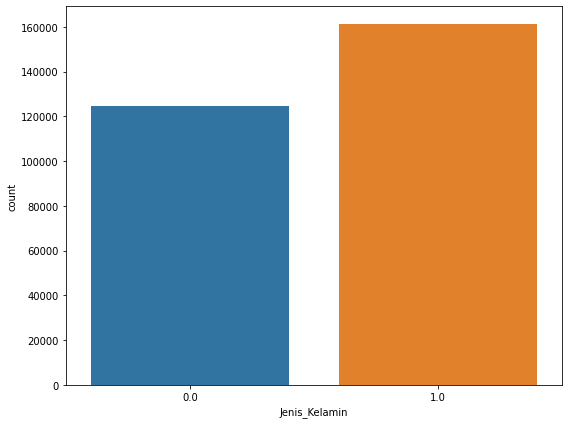

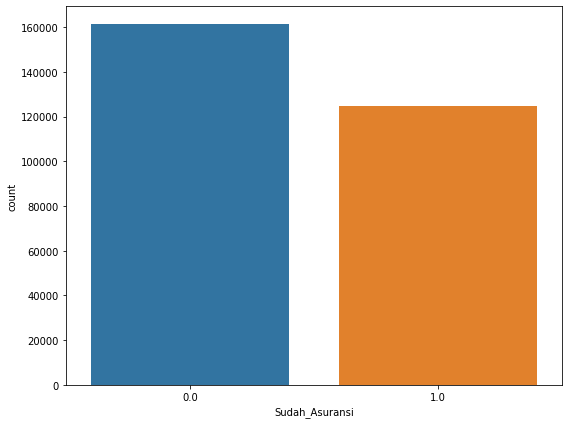

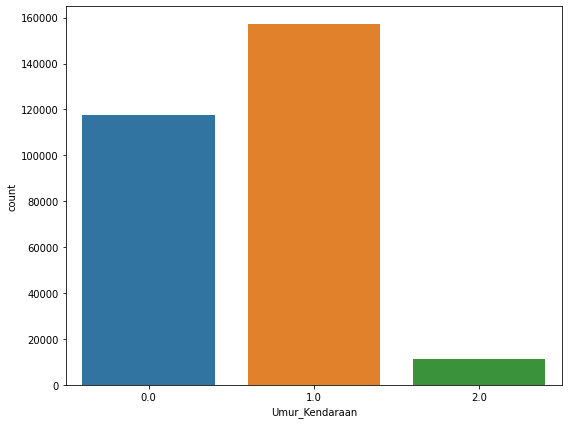

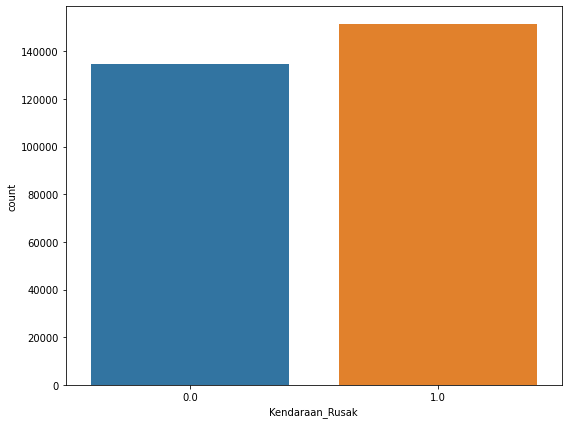

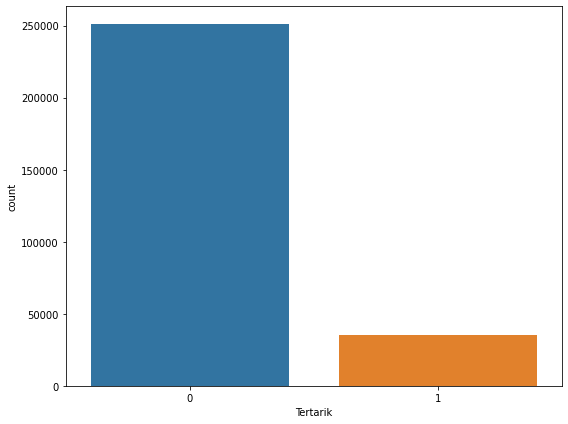

In [12]:
# visualisasi perbandingan data kategorik
kat = ['Jenis_Kelamin', 'Sudah_Asuransi', 'Umur_Kendaraan', 'Kendaraan_Rusak', 'Tertarik']
kategorik = df[kat]
for col in kategorik:
  plt.figure(figsize=(8,6))
  sns.countplot(x=col, data=df)
  plt.tight_layout()

In [13]:
# check duplicated value
df[df['id'].duplicated(keep=False)].sort_values('id')

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik


In [14]:
# drop kolom yang yang tidak digunakan
df = df.drop(['Tertarik'], axis=1)
df.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,1,0.0,30.0,1.0,33.0,1.0,0.0,0.0,28029.0,152.0,97.0
1,2,1.0,48.0,1.0,39.0,0.0,2.0,1.0,25800.0,29.0,158.0
2,3,1.0,21.0,1.0,46.0,1.0,0.0,0.0,32733.0,160.0,119.0
3,4,0.0,58.0,1.0,48.0,0.0,1.0,0.0,2630.0,124.0,63.0
4,5,1.0,50.0,1.0,35.0,0.0,2.0,1.0,34857.0,88.0,194.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

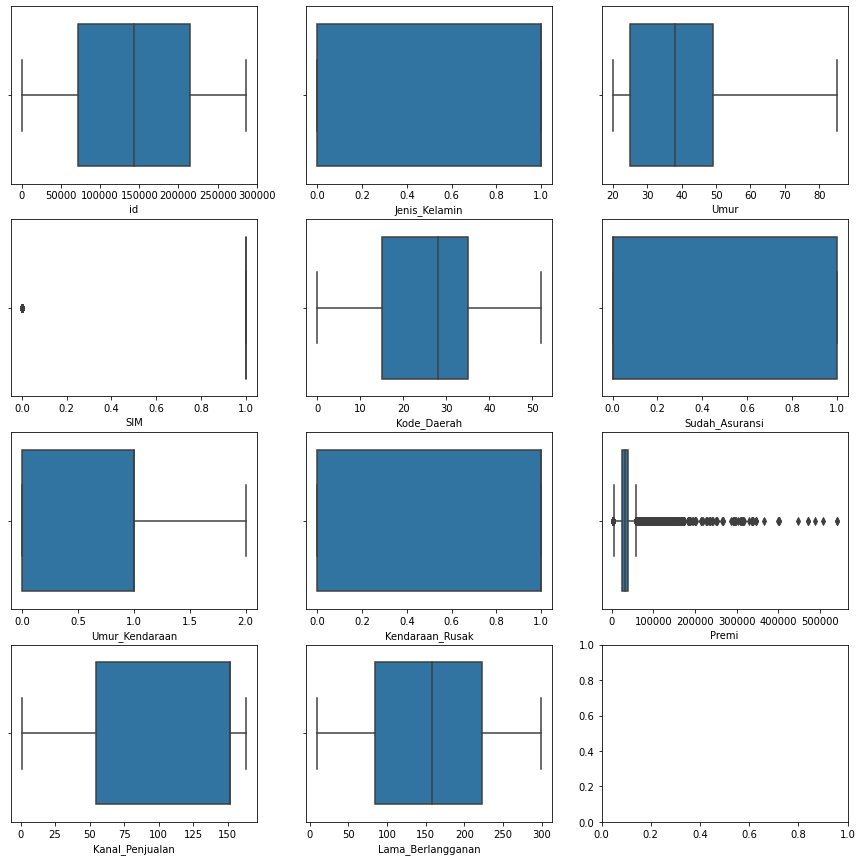

In [15]:
# melihat outlier dengan boxplot
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
sns.boxplot(df["id"], ax=axes[0, 0])
sns.boxplot(df["Jenis_Kelamin"], ax=axes[0, 1])
sns.boxplot(df["Umur"], ax=axes[0, 2])
sns.boxplot(df["SIM"], ax=axes[1, 0])
sns.boxplot(df["Kode_Daerah"], ax=axes[1, 1])
sns.boxplot(df["Sudah_Asuransi"], ax=axes[1, 2])
sns.boxplot(df["Umur_Kendaraan"], ax=axes[2, 0])
sns.boxplot(df["Kendaraan_Rusak"], ax=axes[2, 1])
sns.boxplot(df["Premi"], ax=axes[2, 2])
sns.boxplot(df["Kanal_Penjualan"], ax=axes[3, 0])
sns.boxplot(df["Lama_Berlangganan"], ax=axes[3, 1])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


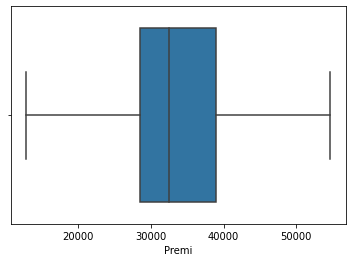

In [39]:
# handling oulier
def drop_outliers(df, Premi):
    iqr = 1.5 * (np.percentile(df['Premi'], 75) - np.percentile(df['Premi'], 25))
    df.drop(df[df['Premi'] > (iqr + np.percentile(df['Premi'], 75))].index, inplace=True)
    df.drop(df[df['Premi'] < (np.percentile(df['Premi'], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'Cost of Living Index')

sns.boxplot(df['Premi'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


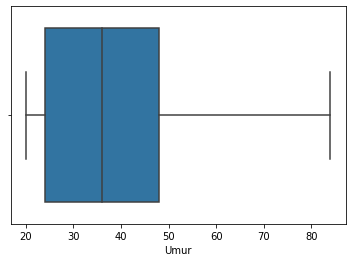

In [40]:
def drop_outliers(df, Umur):
    iqr = 1.5 * (np.percentile(df['Umur'], 75) - np.percentile(df['Umur'], 25))
    df.drop(df[df['Umur'] > (iqr + np.percentile(df['Umur'], 75))].index, inplace=True)
    df.drop(df[df['Umur'] < (np.percentile(df['Umur'], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'Cost of Living Index')

sns.boxplot(df['Umur'])
plt.show()

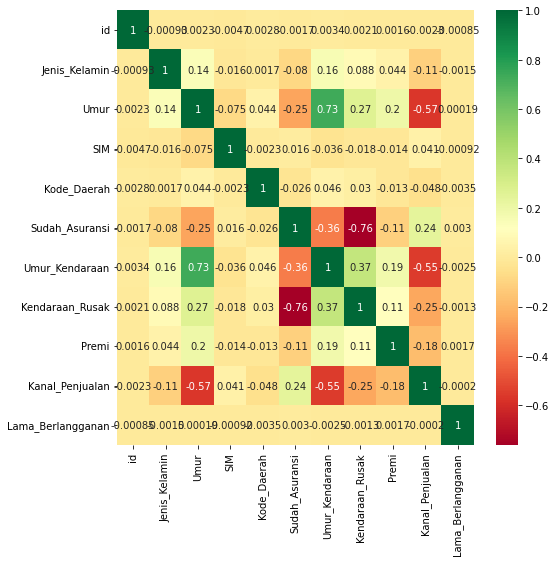

In [18]:
# melihat korelasi antar variabel dengan heatmap
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), cmap = 'RdYlGn', annot = True)
plt.show()

korelasi terbesar yaitu 0.72 yaitu variabel Umur_Kendaraan dan Umur, 0.37 yaitu Umur_Kendaraan dan Kendaraan_Rusak, 0.27 yaitu Kendaraan_rusak dan umur, 0.2 yaitu Premi dan Umur 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


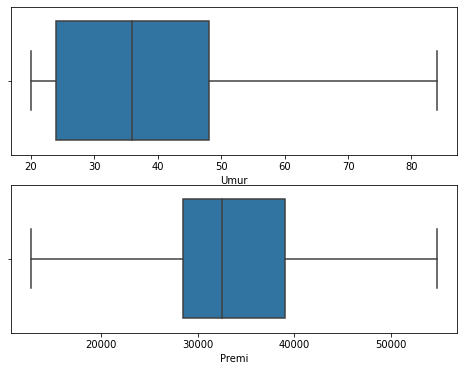

In [41]:
# karena dari 3 korelasi sebelumnya Umur dan Premi bukan merupakan kategorik jadi persebarannya bisa lebih luas
fig, axes = plt.subplots(2,1, figsize=(8, 6))
sns.boxplot(df["Umur"], ax=axes[0])
sns.boxplot(df["Premi"], ax=axes[1])

In [20]:
# split data yang ingin digunakan
clusterr = ['Premi','Umur']
clusterdf = df[clusterr]
clusterdf.head()

,Premi,Umur
0,28029.0,30.0
1,25800.0,48.0
2,32733.0,21.0
4,34857.0,50.0
5,22735.0,21.0


In [21]:
# scalling
scale = MinMaxScaler()
scaledf = scale.fit_transform(clusterdf)
scaledf

array([[0.40900021, 0.15625   ],
       [0.36743067, 0.4375    ],
       [0.49672703, 0.015625  ],
       ...,
       [0.81410268, 0.046875  ],
       [0.45513884, 0.75      ],
       [0.56660637, 0.390625  ]])

In [22]:
# merubah data menjadi 2 dimensi
pca = PCA(n_components=2)
principal = pca.fit_transform(clusterdf)
pcadf = pd.DataFrame(data=principal, columns=['Premi','Umur'])
pcadf

,Premi,Umur
0,6427.739426,-5.955676
1,8656.733068,12.815193
2,1723.742820,-16.582492
3,-400.267082,11.682948
4,11721.742222,-13.124816
...,...,...
230679,8468.741725,-12.249823
230680,-10229.256465,-20.716280
230681,-15294.256854,-20.467944
230682,3953.726432,31.188721


In [23]:
arr = np.array(list(zip(pcadf['Premi'], pcadf['Umur'])))
print(arr)

[[ 6.42773943e+03 -5.95567646e+00]
 [ 8.65673307e+03  1.28151928e+01]
 [ 1.72374282e+03 -1.65824925e+01]
 ...
 [-1.52942569e+04 -2.04679443e+01]
 [ 3.95372643e+03  3.11887209e+01]
 [-2.02326526e+03  6.12165536e+00]]


### Pemodelan

In [24]:
x = pcadf.values 

In [25]:
class KMeans:

    def __init__(self, n_clusters, max_iter=100, random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def initialise_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    def compute_sum_square_error(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
# Fit Data
    def fit(self, X):
        self.centroids = self.initialise_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        return self.compute_sum_square_error(X, self.labels, self.centroids)
    
    def predict(self, X):
        distance = self.compute_distance(X, old_centroids)
        return self.find_closest_cluster(distance)

### Evaluasi

In [27]:
# mengeksekusi nilai k dengan data dan mencari SSE
from numpy.linalg import norm 
from datetime import datetime
start_time = datetime.now()

sum_square_error = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    sum_square_error.append(kmeanModel.fit(x))

end_time = datetime.now()
print('Waktu yang diperlukan: {}'.format(end_time - start_time))

Waktu yang diperlukan: 0:00:28.435730


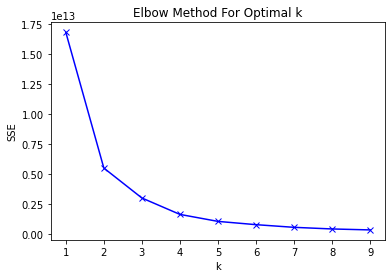

Waktu yang diperlukan: 0:00:00.179630


In [28]:
start_time = datetime.now()
plt.plot(K, sum_square_error, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()


end_time = datetime.now()
print('Waktu yang diperlukan: {}'.format(end_time - start_time))

In [29]:
K = 2
km = KMeans(n_clusters=K, max_iter=100)
km.fit(x)
centroids = km.centroids

### Eksperimen

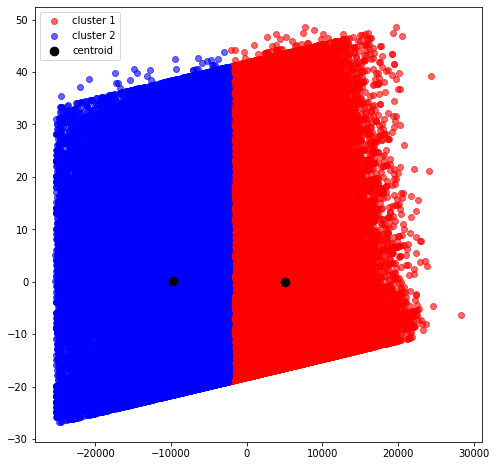

In [31]:
#Plotting data yang sudah di clustering untuk di visualisasi

fig, ax = plt.subplots(figsize=(8, 8))
plt.scatter(x[km.labels == 0, 0], x[km.labels == 0, 1],
            c='red', label='cluster 1', alpha=0.6)
plt.scatter(x[km.labels == 1, 0], x[km.labels == 1, 1],
            c='blue', label='cluster 2', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='.', s=300,
            c='black', label='centroid')
plt.legend()